# Informal benchmarking

Done on my laptop (a Dell XPS 13 9360 with ~8 GB of RAM).

One major caveat of this: all of the sequences I "simulate" as test data are generated randomly. Creating dot plots of similar sequences should give more realistic results.

In [14]:
import time
import random
import wotplot

In [5]:
def genseq(n):
    # generates a random DNA sequence of length n
    s = ""
    for i in range(n):
        s += random.choice("ACGT")
    return s

In [6]:
def sim(n, k, markersize=0.5, fig_size_inches=(5, 5)):
    s1 = genseq(n)
    s2 = genseq(n)
    t0 = time.time()
    m = wotplot.DotPlotMatrix(s1, s2, k, verbose=True)
    t1 = time.time()
    print(f"Matrix construction took {t1 - t0:,.2f} sec.", flush=True)
    fig, ax = wotplot.viz_spy(m, markersize=markersize, title=f"$k$ = {k:,}")
    fig.set_size_inches(fig_size_inches)
    t2 = time.time()
    print(f"Visualization took {t2 - t1:,.2f} sec.", flush=True)
    print(f"Total time taken: {t2 - t0:,.2f} sec.", flush=True)
    return m

# 100 x 100

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.02s: computing ReverseComplement(s2)...
0.02s: computing suffix array for ReverseComplement(s2)...
0.02s: finding forward matches between s1 and s2...
0.04s: found 2,514 forward match cell(s).
0.04s: finding matches between s1 and ReverseComplement(s2)...
0.07s: found 4,998 total match cell(s).
0.07s: density = 49.98%.
0.07s: converting match information to COO format inputs...
0.08s: creating sparse matrix from COO format inputs...
0.08s: done creating the matrix.
Matrix construction took 0.08 sec.
Visualization took 0.03 sec.
Total time taken: 0.11 sec.


DotPlotMatrix(mat=<100x100 sparse matrix of type '<class 'numpy.int64'>'
	with 4998 stored elements in COOrdinate format>, k=1, yorder="BT", binary=True)

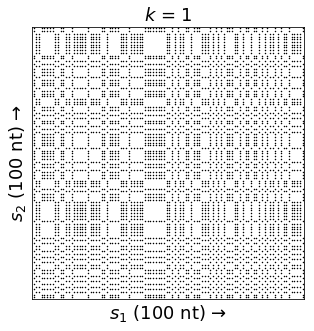

In [29]:
sim(100, 1)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.02s: found 582 forward match cell(s).
0.02s: finding matches between s1 and ReverseComplement(s2)...
0.03s: found 1,019 total match cell(s).
0.03s: density = 10.40%.
0.03s: converting match information to COO format inputs...
0.04s: creating sparse matrix from COO format inputs...
0.04s: done creating the matrix.
Matrix construction took 0.04 sec.
Visualization took 0.03 sec.
Total time taken: 0.07 sec.


DotPlotMatrix(mat=<99x99 sparse matrix of type '<class 'numpy.int64'>'
	with 1019 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True)

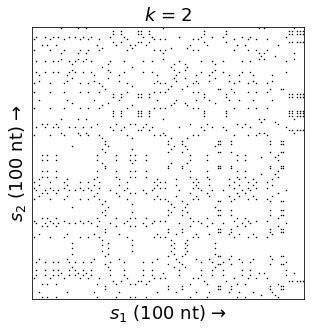

In [30]:
sim(100, 2)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.02s: computing suffix array for ReverseComplement(s2)...
0.02s: finding forward matches between s1 and s2...
0.02s: found 117 forward match cell(s).
0.02s: finding matches between s1 and ReverseComplement(s2)...
0.03s: found 251 total match cell(s).
0.03s: density = 2.61%.
0.03s: converting match information to COO format inputs...
0.03s: creating sparse matrix from COO format inputs...
0.03s: done creating the matrix.
Matrix construction took 0.03 sec.
Visualization took 0.05 sec.
Total time taken: 0.09 sec.


DotPlotMatrix(mat=<98x98 sparse matrix of type '<class 'numpy.int64'>'
	with 251 stored elements in COOrdinate format>, k=3, yorder="BT", binary=True)

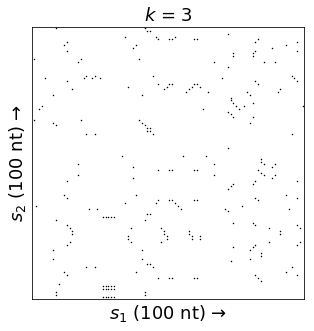

In [32]:
sim(100, 3)

# 500 x 500

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.24s: found 62,009 forward match cell(s).
0.24s: finding matches between s1 and ReverseComplement(s2)...
0.51s: found 124,250 total match cell(s).
0.51s: density = 49.70%.
0.51s: converting match information to COO format inputs...
0.57s: creating sparse matrix from COO format inputs...
0.61s: done creating the matrix.
Matrix construction took 0.63 sec.
Visualization took 0.02 sec.
Total time taken: 0.65 sec.


DotPlotMatrix(mat=<500x500 sparse matrix of type '<class 'numpy.int64'>'
	with 124250 stored elements in COOrdinate format>, k=1, yorder="BT", binary=True)

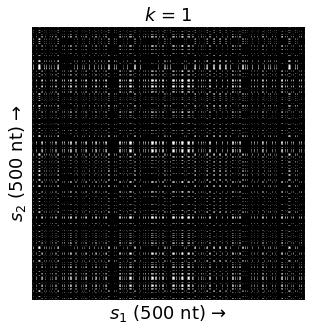

In [26]:
sim(500, 1)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.02s: finding forward matches between s1 and s2...
0.08s: found 15,493 forward match cell(s).
0.08s: finding matches between s1 and ReverseComplement(s2)...
0.16s: found 26,530 total match cell(s).
0.16s: density = 10.65%.
0.16s: converting match information to COO format inputs...
0.17s: creating sparse matrix from COO format inputs...
0.18s: done creating the matrix.
Matrix construction took 0.19 sec.
Visualization took 0.03 sec.
Total time taken: 0.23 sec.


DotPlotMatrix(mat=<499x499 sparse matrix of type '<class 'numpy.int64'>'
	with 26530 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True)

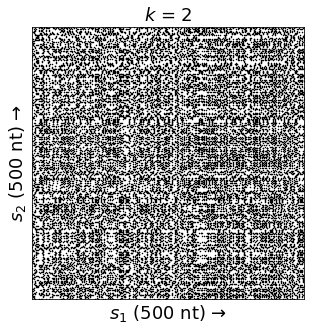

In [27]:
sim(500, 2)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.03s: found 207 forward match cell(s).
0.03s: finding matches between s1 and ReverseComplement(s2)...
0.05s: found 422 total match cell(s).
0.05s: density = 0.17%.
0.05s: converting match information to COO format inputs...
0.05s: creating sparse matrix from COO format inputs...
0.05s: done creating the matrix.
Matrix construction took 0.05 sec.
Visualization took 0.03 sec.
Total time taken: 0.08 sec.


DotPlotMatrix(mat=<496x496 sparse matrix of type '<class 'numpy.int64'>'
	with 422 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True)

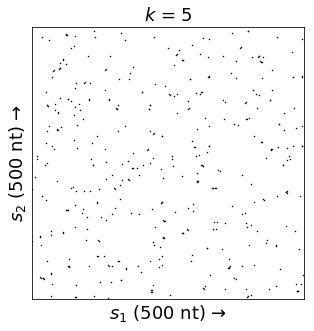

In [28]:
sim(500, 5)

# 1,000 x 1,000

0.02s: validating inputs...
0.02s: computing suffix array for s1...
0.03s: computing suffix array for s2...
0.03s: computing ReverseComplement(s2)...
0.03s: computing suffix array for ReverseComplement(s2)...
0.04s: finding forward matches between s1 and s2...
0.32s: found 62,917 forward match cell(s).
0.32s: finding matches between s1 and ReverseComplement(s2)...
0.56s: found 109,152 total match cell(s).
0.56s: density = 10.94%.
0.56s: converting match information to COO format inputs...
0.62s: creating sparse matrix from COO format inputs...
0.66s: done creating the matrix.
Matrix construction took 0.68 sec.
Visualization took 0.06 sec.
Total time taken: 0.73 sec.


DotPlotMatrix(mat=<999x999 sparse matrix of type '<class 'numpy.int64'>'
	with 109152 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True)

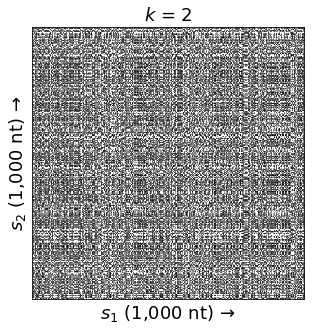

In [4]:
sim(1000, 2, markersize=0.1)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.11s: found 15,657 forward match cell(s).
0.11s: finding matches between s1 and ReverseComplement(s2)...
0.20s: found 31,167 total match cell(s).
0.20s: density = 3.13%.
0.20s: converting match information to COO format inputs...
0.21s: creating sparse matrix from COO format inputs...
0.22s: done creating the matrix.
Matrix construction took 0.23 sec.
Visualization took 0.02 sec.
Total time taken: 0.25 sec.


DotPlotMatrix(mat=<998x998 sparse matrix of type '<class 'numpy.int64'>'
	with 31167 stored elements in COOrdinate format>, k=3, yorder="BT", binary=True)

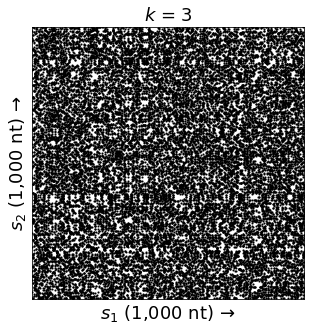

In [33]:
sim(1000, 3, markersize=1)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.02s: finding forward matches between s1 and s2...
0.05s: found 944 forward match cell(s).
0.05s: finding matches between s1 and ReverseComplement(s2)...
0.08s: found 1,883 total match cell(s).
0.08s: density = 0.19%.
0.08s: converting match information to COO format inputs...
0.08s: creating sparse matrix from COO format inputs...
0.08s: done creating the matrix.
Matrix construction took 0.08 sec.
Visualization took 0.03 sec.
Total time taken: 0.11 sec.


DotPlotMatrix(mat=<996x996 sparse matrix of type '<class 'numpy.int64'>'
	with 1883 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True)

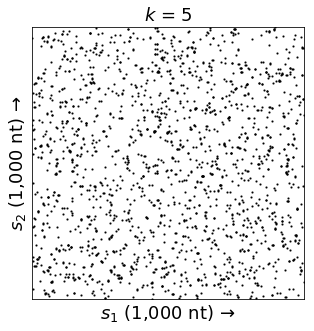

In [5]:
sim(1000, 5, markersize=1)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.05s: found 8 forward match cell(s).
0.05s: finding matches between s1 and ReverseComplement(s2)...
0.08s: found 8 total match cell(s).
0.08s: density = 0.00%.
0.08s: converting match information to COO format inputs...
0.09s: creating sparse matrix from COO format inputs...
0.09s: done creating the matrix.
Matrix construction took 0.09 sec.
Visualization took 0.03 sec.
Total time taken: 0.12 sec.


DotPlotMatrix(mat=<991x991 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True)

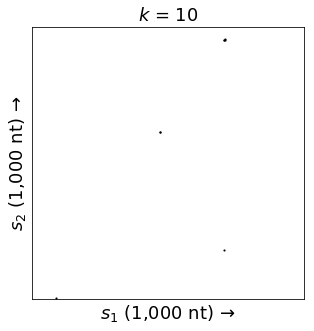

In [6]:
sim(1000, 10, markersize=1)

# 10,000 x 10,000

I don't know why you'd want to use $k$ = 2 in practice for two long sequences but here you go, it's possible

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
18.93s: found 6,247,282 forward match cell(s).
18.94s: finding matches between s1 and ReverseComplement(s2)...
41.48s: found 10,925,150 total match cell(s).
41.48s: density = 10.93%.
41.48s: converting match information to COO format inputs...
48.31s: creating sparse matrix from COO format inputs...
51.84s: done creating the matrix.
Matrix construction took 53.39 sec.
Visualization took 1.09 sec.
Total time taken: 54.47 sec.


DotPlotMatrix(mat=<9999x9999 sparse matrix of type '<class 'numpy.int64'>'
	with 10925150 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True)

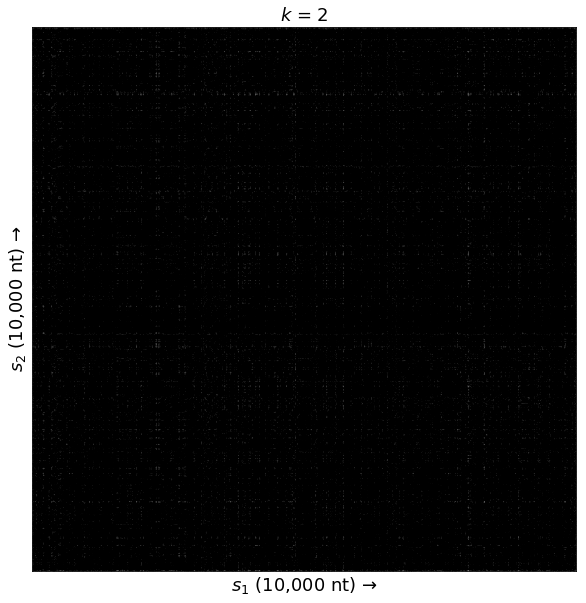

In [7]:
sim(10000, 2, markersize=0.005, fig_size_inches=(10, 10))

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.40s: found 97,997 forward match cell(s).
0.40s: finding matches between s1 and ReverseComplement(s2)...
0.79s: found 195,915 total match cell(s).
0.79s: density = 0.20%.
0.79s: converting match information to COO format inputs...
0.90s: creating sparse matrix from COO format inputs...
0.97s: done creating the matrix.
Matrix construction took 1.00 sec.
Visualization took 0.03 sec.
Total time taken: 1.03 sec.


DotPlotMatrix(mat=<9996x9996 sparse matrix of type '<class 'numpy.int64'>'
	with 195915 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True)

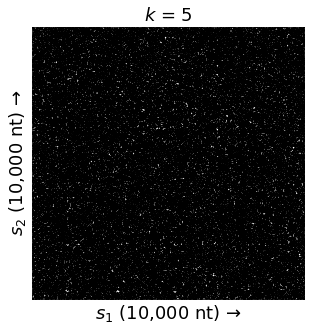

In [8]:
sim(10000, 5)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: computing ReverseComplement(s2)...
0.02s: computing suffix array for ReverseComplement(s2)...
0.02s: finding forward matches between s1 and s2...
0.24s: found 109 forward match cell(s).
0.24s: finding matches between s1 and ReverseComplement(s2)...
0.39s: found 201 total match cell(s).
0.39s: density = 0.00%.
0.39s: converting match information to COO format inputs...
0.39s: creating sparse matrix from COO format inputs...
0.39s: done creating the matrix.
Matrix construction took 0.39 sec.
Visualization took 0.03 sec.
Total time taken: 0.43 sec.


DotPlotMatrix(mat=<9991x9991 sparse matrix of type '<class 'numpy.int64'>'
	with 201 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True)

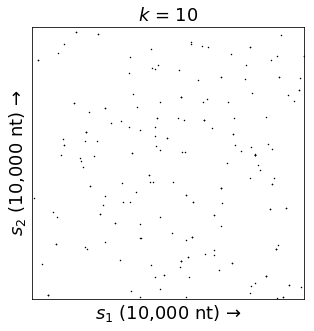

In [9]:
sim(10000, 10)

0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding forward matches between s1 and s2...
0.23s: found 0 forward match cell(s).
0.23s: finding matches between s1 and ReverseComplement(s2)...
0.38s: found 0 total match cell(s).
0.38s: density = 0.00%.
0.38s: converting match information to COO format inputs...
0.38s: creating sparse matrix from COO format inputs...
0.38s: done creating the matrix.
Matrix construction took 0.38 sec.
Visualization took 0.03 sec.
Total time taken: 0.41 sec.


DotPlotMatrix(mat=<9981x9981 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True)

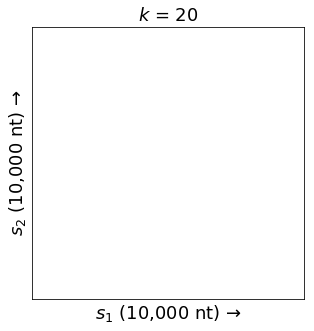

In [10]:
sim(10000, 20)

# 100,000 x 100,000

0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.02s: computing ReverseComplement(s2)...
0.04s: computing suffix array for ReverseComplement(s2)...
0.05s: finding forward matches between s1 and s2...
31.37s: found 9,767,292 forward match cell(s).
31.37s: finding matches between s1 and ReverseComplement(s2)...
69.62s: found 19,535,675 total match cell(s).
69.62s: density = 0.20%.
69.63s: converting match information to COO format inputs...
82.93s: creating sparse matrix from COO format inputs...
90.23s: done creating the matrix.
Matrix construction took 93.21 sec.
Visualization took 1.58 sec.
Total time taken: 94.79 sec.


DotPlotMatrix(mat=<99996x99996 sparse matrix of type '<class 'numpy.int64'>'
	with 19535675 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True)

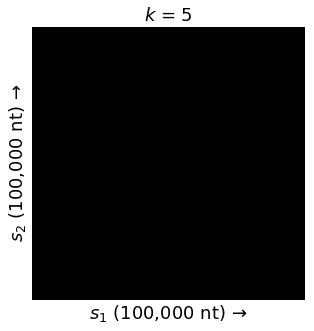

In [11]:
sim(100000, 5)

0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.02s: computing ReverseComplement(s2)...
0.04s: computing suffix array for ReverseComplement(s2)...
0.05s: finding forward matches between s1 and s2...
1.67s: found 9,508 forward match cell(s).
1.67s: finding matches between s1 and ReverseComplement(s2)...
3.30s: found 18,963 total match cell(s).
3.30s: density = 0.00%.
3.30s: converting match information to COO format inputs...
3.31s: creating sparse matrix from COO format inputs...
3.32s: done creating the matrix.
Matrix construction took 3.32 sec.
Visualization took 0.03 sec.
Total time taken: 3.35 sec.


DotPlotMatrix(mat=<99991x99991 sparse matrix of type '<class 'numpy.int64'>'
	with 18963 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True)

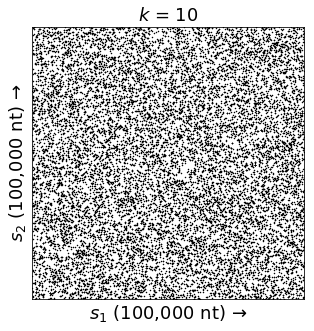

In [12]:
sim(100000, 10)

0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.03s: computing ReverseComplement(s2)...
0.05s: computing suffix array for ReverseComplement(s2)...
0.05s: finding forward matches between s1 and s2...
1.70s: found 0 forward match cell(s).
1.70s: finding matches between s1 and ReverseComplement(s2)...
3.22s: found 0 total match cell(s).
3.22s: density = 0.00%.
3.22s: converting match information to COO format inputs...
3.22s: creating sparse matrix from COO format inputs...
3.22s: done creating the matrix.
Matrix construction took 3.22 sec.
Visualization took 0.02 sec.
Total time taken: 3.24 sec.


DotPlotMatrix(mat=<99981x99981 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True)

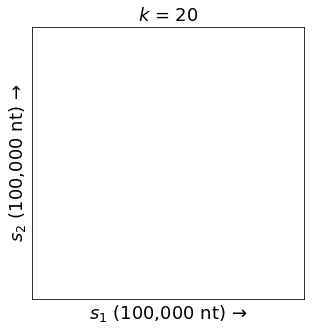

In [13]:
sim(100000, 20)

# 1,000,000 x 1,000,000

In [ ]:
m = sim(1000000, 5, markersize=0.001, fig_size_inches=(10, 10))

0.00s: validating inputs...
0.08s: computing suffix array for s1...
0.13s: computing suffix array for s2...
0.18s: computing ReverseComplement(s2)...
0.36s: computing suffix array for ReverseComplement(s2)...
0.41s: finding forward matches between s1 and s2...


This crashed Jupyter :( So I'm gonna go with "probably don't use $k$ = 5 for 1 Mbp sequences," at least for now...

Since there are only $4^5 = 1,024$ possible $5$-mers, my suspicion is that the amount of memory required to store the match information becomes prohibitive (the dot plot matrix will be extremely dense). If we need to store $1,000,000^2$ `int`s in memory, and one `int` takes up 1 byte (this is an underestimate -- apparently `int`s in python [generally take up 4 bytes](http://projectpython.net/chapter02/#integer-types)), then we need $1,000,000,000,000$ bytes of memory (aka 1 TB). This is not feasible on my laptop!

0.00s: validating inputs...
0.07s: computing suffix array for s1...
0.13s: computing suffix array for s2...
0.19s: computing ReverseComplement(s2)...
0.36s: computing suffix array for ReverseComplement(s2)...
0.42s: finding forward matches between s1 and s2...
15.59s: found 953,523 forward match cell(s).
15.59s: finding matches between s1 and ReverseComplement(s2)...
31.92s: found 1,906,286 total match cell(s).
31.92s: density = 0.00%.
31.92s: converting match information to COO format inputs...
32.98s: creating sparse matrix from COO format inputs...
33.60s: done creating the matrix.
Matrix construction took 33.92 sec.
Visualization took 0.19 sec.
Total time taken: 34.12 sec.


DotPlotMatrix(mat=<999991x999991 sparse matrix of type '<class 'numpy.int64'>'
	with 1906286 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True)

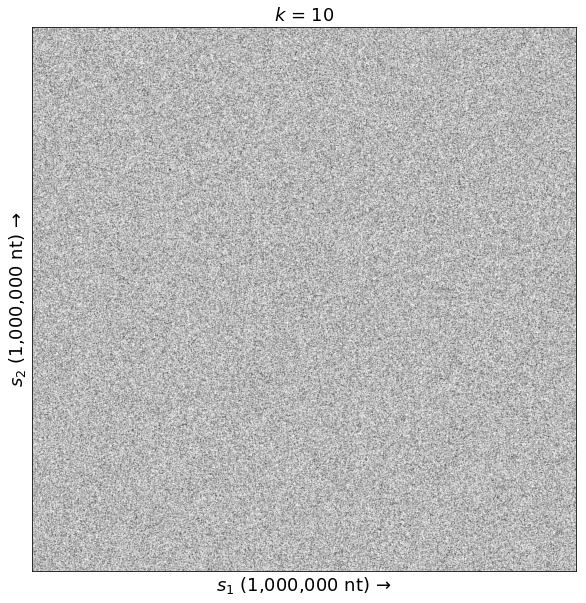

In [11]:
sim(1000000, 10, markersize=0.005, fig_size_inches=(10, 10))

0.00s: validating inputs...
0.08s: computing suffix array for s1...
0.13s: computing suffix array for s2...
0.19s: computing ReverseComplement(s2)...
0.37s: computing suffix array for ReverseComplement(s2)...
0.43s: finding forward matches between s1 and s2...
15.25s: found 0 forward match cell(s).
15.25s: finding matches between s1 and ReverseComplement(s2)...
30.35s: found 1 total match cell(s).
30.35s: density = 0.00%.
30.35s: converting match information to COO format inputs...
30.35s: creating sparse matrix from COO format inputs...
30.35s: done creating the matrix.
Matrix construction took 30.35 sec.
Visualization took 0.02 sec.
Total time taken: 30.37 sec.


DotPlotMatrix(mat=<999981x999981 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True)

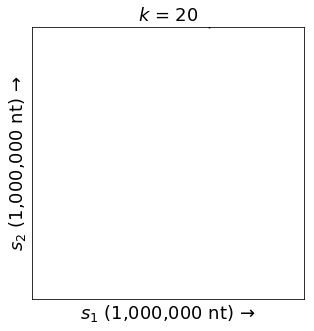

In [12]:
sim(1000000, 20, markersize=1)

# 10,000,000 x 10,000,000

In [ ]:
sim(10000000, 10, markersize=0.005, fig_size_inches=(10, 10))

0.02s: validating inputs...
0.70s: computing suffix array for s1...
1.55s: computing suffix array for s2...
2.40s: computing ReverseComplement(s2)...
3.66s: computing suffix array for ReverseComplement(s2)...
4.51s: finding forward matches between s1 and s2...


This also crashed Jupyter.

0.00s: validating inputs...
0.73s: computing suffix array for s1...
1.57s: computing suffix array for s2...
2.41s: computing ReverseComplement(s2)...
3.68s: computing suffix array for ReverseComplement(s2)...
4.51s: finding forward matches between s1 and s2...
163.66s: found 111 forward match cell(s).
163.66s: finding matches between s1 and ReverseComplement(s2)...
324.72s: found 205 total match cell(s).
324.72s: density = 0.00%.
324.72s: converting match information to COO format inputs...
324.73s: creating sparse matrix from COO format inputs...
324.73s: done creating the matrix.
Matrix construction took 324.74 sec.
Visualization took 0.06 sec.
Total time taken: 324.80 sec.


DotPlotMatrix(mat=<9999981x9999981 sparse matrix of type '<class 'numpy.int64'>'
	with 205 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True)

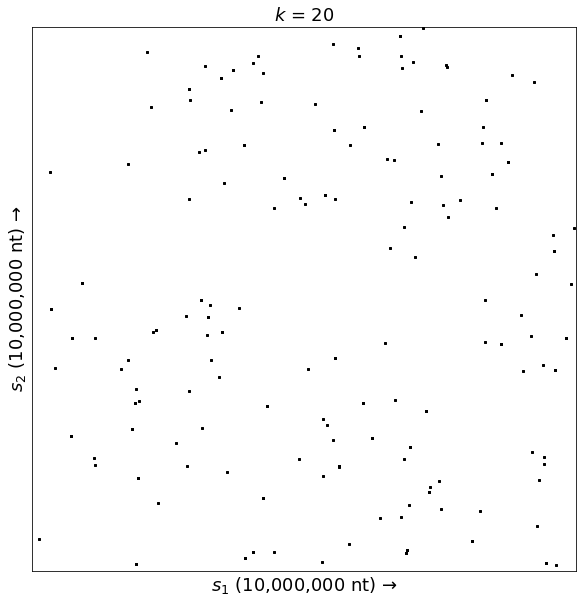

In [8]:
sim(10000000, 20, markersize=2, fig_size_inches=(10, 10))

0.00s: validating inputs...
0.78s: computing suffix array for s1...
1.63s: computing suffix array for s2...
2.48s: computing ReverseComplement(s2)...
3.80s: computing suffix array for ReverseComplement(s2)...
4.65s: finding forward matches between s1 and s2...
164.19s: found 0 forward match cell(s).
164.19s: finding matches between s1 and ReverseComplement(s2)...
324.01s: found 0 total match cell(s).
324.01s: density = 0.00%.
324.01s: converting match information to COO format inputs...
324.02s: creating sparse matrix from COO format inputs...
324.02s: done creating the matrix.
Matrix construction took 324.03 sec.
Visualization took 0.02 sec.
Total time taken: 324.05 sec.


DotPlotMatrix(mat=<9999901x9999901 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in COOrdinate format>, k=100, yorder="BT", binary=True)

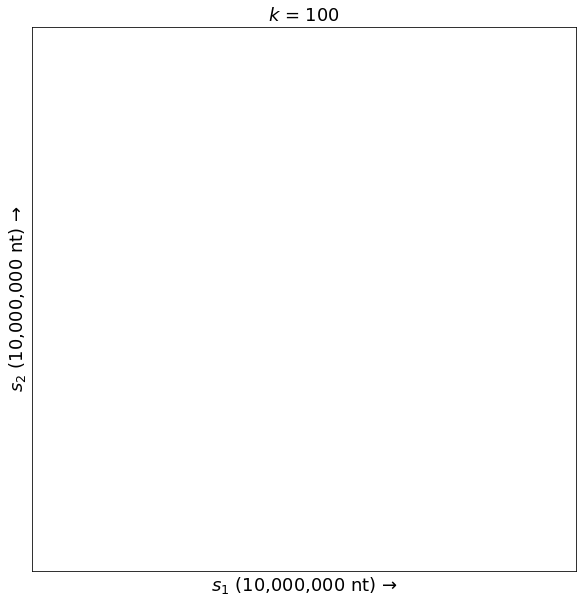

In [9]:
sim(10000000, 100, markersize=3, fig_size_inches=(10, 10))

# 100,000,000 x 100,000,000

0.00s: validating inputs...
7.59s: computing suffix array for s1...
21.07s: computing suffix array for s2...
34.46s: computing ReverseComplement(s2)...
46.95s: computing suffix array for ReverseComplement(s2)...
60.31s: finding forward matches between s1 and s2...
1,655.51s: found 9,285 forward match cell(s).
1,655.51s: finding matches between s1 and ReverseComplement(s2)...
3,252.33s: found 18,236 total match cell(s).
3,252.34s: density = 0.00%.
3,252.34s: converting match information to COO format inputs...
3,252.34s: creating sparse matrix from COO format inputs...
3,252.35s: done creating the matrix.
Matrix construction took 3,252.42 sec.
Visualization took 0.03 sec.
Total time taken: 3,252.45 sec.


DotPlotMatrix(mat=<99999981x99999981 sparse matrix of type '<class 'numpy.int64'>'
	with 18236 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True)

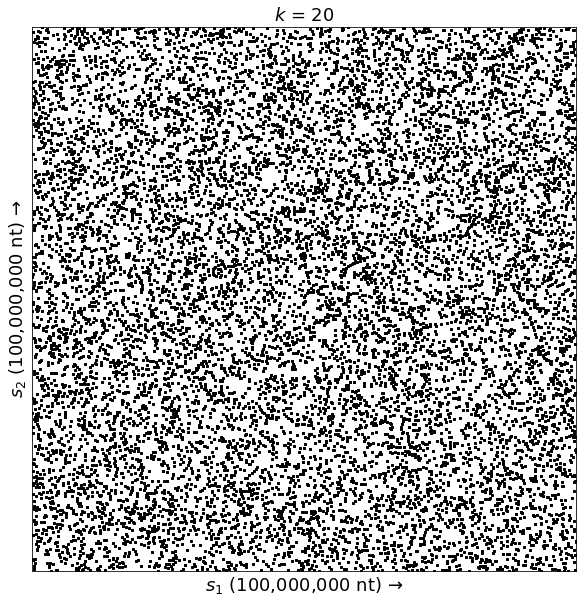

In [10]:
sim(100000000, 20, markersize=2, fig_size_inches=(10, 10))

So we can actually create a dot plot of two 100 Mbp sequences (using a large enough $k$) -- it just takes ~54 minutes, at least on my laptop.